# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [22]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [25]:
%%R
 
# Import data with R
df <- read_csv('privateschools.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 26
      X     Y OBJECTID PPIN    NAME  STREET CITY  STATE   ZIP STFIP  CNTY NMCNTY
  <dbl> <dbl>    <dbl> <chr>   <chr> <chr>  <chr> <chr> <dbl> <dbl> <dbl> <chr> 
1 -86.5  32.5        1 2722    AUTA… 497 G… PRAT… AL    36067     1  1001 Autau…
2 -86.5  32.5        2 A01000… CAME… 201 W… PRAT… AL    36067     1  1001 Autau…
3 -86.5  32.5        3 A09000… FIRS… 211 S… PRAT… AL    36067     1  1001 Autau…
4 -86.5  32.5        4 A15920… NEW … 301 W… PRAT… AL    36067     1  1001 Autau…
# ℹ 14 more variables: LOCALE <dbl>, LAT <dbl>, LON <dbl>, CBSA <chr>,
#   NMCBSA <chr>, CBSATYPE <chr>, CSA <chr>, NMCSA <chr>, NECTA <chr>,
#   NMNECTA <chr>, CD <dbl>, SLDL <chr>, SLDU <chr>, SCHOOLYEAR <chr>


In [7]:
#The data dictionary
#https://nces.ed.gov/programs/edge/docs/EDGE_GEOCODE_PRIVATESCH_FILEDOC.pdf

In [8]:
df=pd.read_csv('privateschools.csv')
df

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,STFIP,...,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR
0,-86.541877,32.472090,1,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,1,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1069,1030,2021-2022
1,-86.458475,32.469350,2,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,36067,1,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022
2,-86.472061,32.460800,3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,1,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022
3,-86.466175,32.455425,4,A1592005,NEW HOPE ACADEMY,301 WATER ST,PRATTVILLE,AL,36067,1,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022
4,-86.470441,32.461710,5,K9300030,FIRST BAPTIST PRESCHOOL AND KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,AL,36067,1,...,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,-110.810241,43.491060,22341,A0303404,MOUNTAIN ACADEMY OF TETON SCIENCE SCHOOLS,700 COYOTE CANYON RD,JACKSON,WY,83001,56,...,"Jackson, WY-ID",2,N,N,N,N,5600,56023,56017,2021-2022
22341,-110.799526,43.458650,22342,A0903887,JACKSON HOLE COMMUNITY SCHOOL,"1715 HIGH SCHOOL ROAD, #240",JACKSON,WY,83001,56,...,"Jackson, WY-ID",2,N,N,N,N,5600,56016,56017,2021-2022
22342,-110.844286,43.367002,22343,A1102418,RED TOP MEADOWS,7905 FALL CREEK RD,WILSON,WY,83014,56,...,"Jackson, WY-ID",2,N,N,N,N,5600,56022,56016,2021-2022
22343,-110.810901,43.441910,22344,A2000010,JACKSON HOLE CLASSICAL ACADEMY,2500 S PARK LOOP RD,JACKSON,WY,83001,56,...,"Jackson, WY-ID",2,N,N,N,N,5600,56023,56017,2021-2022


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [9]:
%%R
# Load the dataset
df <- read.csv("privateschools.csv")  

str(df)  

summary(df$ZIP)  



'data.frame':	22345 obs. of  26 variables:
 $ X         : num  -86.5 -86.5 -86.5 -86.5 -86.5 ...
 $ Y         : num  32.5 32.5 32.5 32.5 32.5 ...
 $ OBJECTID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PPIN      : chr  "2722" "A0100060" "A0900032" "A1592005" ...
 $ NAME      : chr  "AUTAUGA ACADEMY" "CAMELLIA BAPTIST WEM" "FIRST PRESBYTERIAN KINDERGARTEN" "NEW HOPE ACADEMY" ...
 $ STREET    : chr  "497 GOLSON RD" "201 WOODVALE RD" "211 S CHESTNUT ST" "301 WATER ST" ...
 $ CITY      : chr  "PRATTVILLE" "PRATTVILLE" "PRATTVILLE" "PRATTVILLE" ...
 $ STATE     : chr  "AL" "AL" "AL" "AL" ...
 $ ZIP       : int  36067 36067 36067 36067 36067 36530 36526 36532 36567 36542 ...
 $ STFIP     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CNTY      : int  1001 1001 1001 1001 1001 1003 1003 1003 1003 1003 ...
 $ NMCNTY    : chr  "Autauga County" "Autauga County" "Autauga County" "Autauga County" ...
 $ LOCALE    : int  41 21 21 21 21 41 13 13 31 31 ...
 $ LAT       : num  32.5 32.5 32.5 32.5 32.5 ...
 $ LON       : nu

In [10]:
%%R
#Given I am curious about value_count

table(df$CITY)    



             AARONSBURG               ABBEVILLE              ABBOTSFORD 
                      2                       5                       1 
               ABERDEEN                 ABILENE                ABINGDON 
                     12                       7                       2 
               ABINGTON           ABITA SPRINGS                 ABSECON 
                      2                       1                       3 
                 ACAMPO                   ACTON                 ACWORTH 
                      1                       1                       6 
                    ADA           ADAIR VILLAGE             ADAIRSVILLE 
                      2                       1                       1 
                  ADAMS              ADAMSVILLE                   ADDIS 
                      1                       1                       1 
                ADDISON                    ADEL                ADELANTO 
                      3                       1   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



            MOUNT KISCO            MOUNT LAUREL 
                      2                       2                       4 
          MOUNT LEBANON          MOUNT PLEASANT    MOUNT PLEASANT MILLS 
                      1                      19                       4 
         MOUNT PROSPECT           MOUNT PULASKI          MOUNT STERLING 
                      3                       1                       3 
           MOUNT VERNON           MOUNT VICTORY              MOUNT WOLF 
                     15                       1                       1 
          MOUNTAIN CITY          MOUNTAIN GROVE           MOUNTAIN HOME 
                      1                       1                       2 
          MOUNTAIN LAKE          MOUNTAIN LAKES           MOUNTAIN REST 
                      3                       1                       1 
           MOUNTAIN TOP           MOUNTAIN VIEW            MOUNTAINSIDE 
                      2                      11                       2 
  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
%%R
#Given I am curious about value_count

table(df$STATE)  



  AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL   GA   HI   IA   ID   IL   IN 
  30  277  117  300 2452  282  251   61   77 1937  611  105  182  124  967  596 
  KS   KY   LA   MA   MD   ME   MI   MN   MO   MS   MT   NC   ND   NE   NH   NJ 
 157  270  283  506  519  102  564  409  488  157  104  542   43  173  149  783 
  NM   NV   NY   OH   OK   OR   PA   RI   SC   SD   TN   TX   UT   VA   VT   WA 
 130  101 1217  978  133  262 1545   86  282   68  415 1308  122  659   95  498 
  WI   WV   WY 
 708   93   27 


In [12]:
df['LOCALE']

0        41
1        21
2        21
3        21
4        21
         ..
22340    41
22341    33
22342    42
22343    41
22344    33
Name: LOCALE, Length: 22345, dtype: int64

In [13]:
df.dtypes

X             float64
Y             float64
OBJECTID        int64
PPIN           object
NAME           object
STREET         object
CITY           object
STATE          object
ZIP             int64
STFIP           int64
CNTY            int64
NMCNTY         object
LOCALE          int64
LAT           float64
LON           float64
CBSA           object
NMCBSA         object
CBSATYPE       object
CSA            object
NMCSA          object
NECTA          object
NMNECTA        object
CD              int64
SLDL           object
SLDU           object
SCHOOLYEAR     object
dtype: object

In [14]:
%%R

discrete_variables <- c('STATE', 'NMCNTY', 'STREET')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

df %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 23,182 × 3
# Groups:   variable [3]
   variable value            count
   <chr>    <chr>            <int>
 1 NMCNTY   Abbeville County     2
 2 NMCNTY   Acadia Parish        6
 3 NMCNTY   Ada County          34
 4 NMCNTY   Adair County         4
 5 NMCNTY   Adams County        88
 6 NMCNTY   Addison County       4
 7 NMCNTY   Aiken County        14
 8 NMCNTY   Alachua County      21
 9 NMCNTY   Alamance County      9
10 NMCNTY   Alameda County     130
# ℹ 23,172 more rows
# ℹ Use `print(n = ...)` to see more rows


In addition: Warning message:
Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(discrete_variables)

  # Now:
  data %>% select(all_of(discrete_variables))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [15]:
#For my own understanding:
#If you measure it → Continuous
#If you count it → Discrete

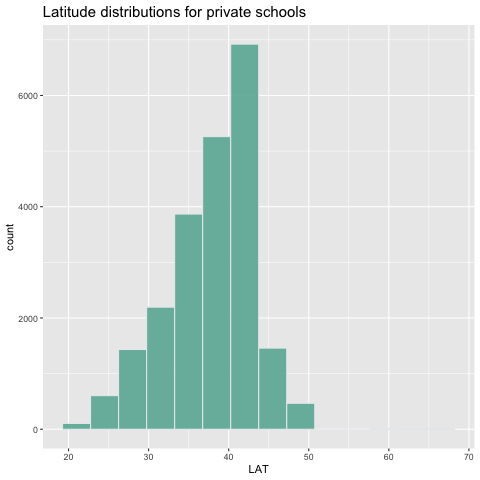

In [16]:
%%R
ggplot(df, aes(x = LAT)) + 
  geom_histogram(binwidth=3.5, fill="#69b3a2", color="#e9ecef", alpha=0.9) + 
  ggtitle("Latitude distributions for private schools") + 
  theme(plot.title = element_text(size=15))

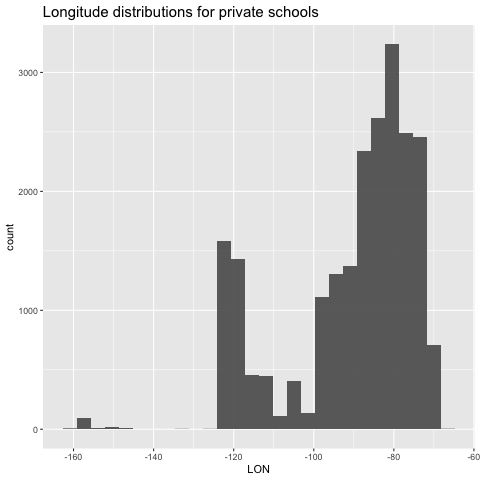

In [28]:
%%R
ggplot(df, aes(x = LON)) + 
  geom_histogram(binwidth=3.5, alpha=0.9) + 
  ggtitle("Longitude distributions for private schools") + 
  theme(plot.title = element_text(size=15))

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

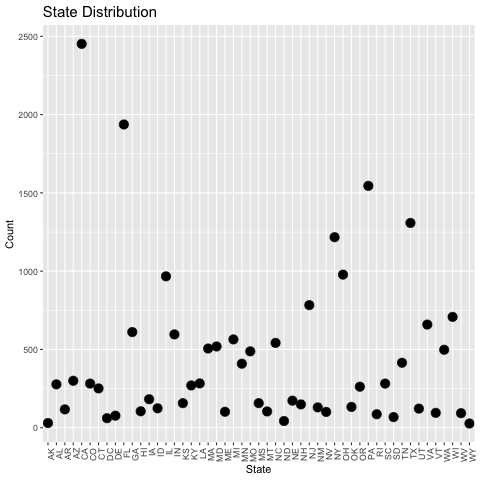

In [29]:
%%R
#California has the highest amount of private schools. 

ggplot(df, aes(x = factor(STATE))) + 
  geom_point(stat = "count", size = 4) + 
  ggtitle("State Distribution") + 
  xlab("State") + ylab("Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size=15))

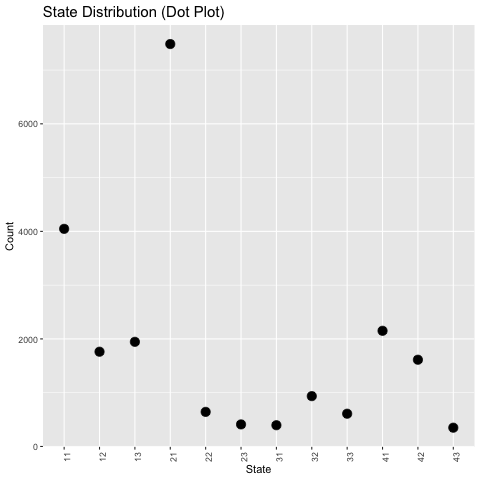

In [7]:
%%R
ggplot(df, aes(x = factor(LOCALE))) + 
  geom_point(stat = "count", size = 4) + 
  ggtitle("State Distribution (Dot Plot)") + 
  xlab("State") + ylab("Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size=15))


#This shows most private schools are located in suburban areas. 
